In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('../data/raw/911.csv')

In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
# mostra os ceps mais listados
df['zip'].value_counts()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
           ... 
77316.0       1
19457.0       1
19139.0       1
19119.0       1
17752.0       1
Name: zip, Length: 104, dtype: int64

In [5]:
# Endereços mais frequentes na lista de chamadas 911
df['twp'].value_counts()

LOWER MERION     8443
ABINGTON         5977
NORRISTOWN       5890
UPPER MERION     5227
CHELTENHAM       4575
                 ... 
BRYN ATHYN        173
SALFORD           163
GREEN LANE         51
PHILA COUNTY       43
LEHIGH COUNTY      30
Name: twp, Length: 68, dtype: int64

In [6]:
#título das chamadas mais frequentes
df['title'].value_counts()

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
                               ...  
Fire: UNCONSCIOUS SUBJECT          1
Fire: PLANE CRASH                  1
Fire: DIABETIC EMERGENCY           1
EMS: DISABLED VEHICLE              1
EMS: PLANE CRASH                   1
Name: title, Length: 110, dtype: int64

In [7]:
# criando uma coluna para acrescentar as razões dos acontecimentos, que precedem o title
# testando a lógica
x = df['title'].iloc[0]
x.split(':')[0]

df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [8]:
# qual a razão mais frequente
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

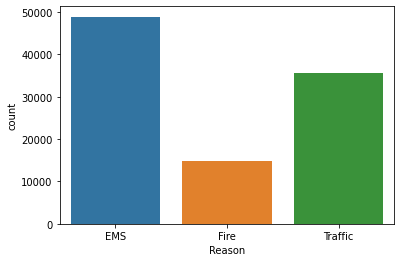

In [9]:
#gráfico de contagem de ligações por razão
sns.countplot(df['Reason'])

In [10]:
# Analisando as datas, que tipo de objeto está nesta coluna
type(df['timeStamp'][0])

str

In [11]:
# transformando str em date time object
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'][0])
df['timeStamp'].head()

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

In [25]:
# para criar 3 colunas com hora, mês e dia da semana (0=seg, 1=ter, 2=quar, 3=quin, 4=sex, 5= sab, 6= dom)
# teste da lógica
time = df['timeStamp'][0]
time.dayofweek
time.hour
time.month

df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of week'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Mounth,Day of week,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,12


In [26]:
# substituir os valores numéricos por str pela função .map()
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Day of week'] = df['Day of week'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Mounth,Day of week,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,12


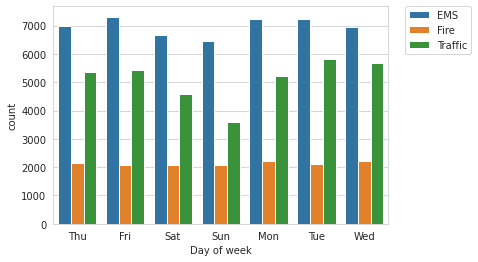

In [34]:
# gráfico de contagem de chamadas por dia da semana junto com as razões
sns.countplot(df['Day of week'], hue=df['Reason'])
#para tirar a legenda de dentro do gráfico
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
# para adicionar um grid ao fundo dos mapas, linha traçejada, rede
sns.set_style('whitegrid')

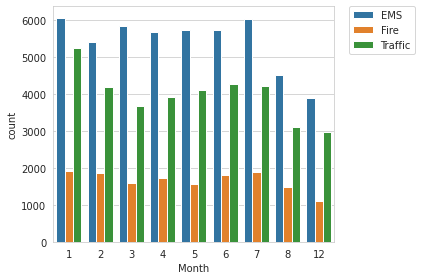

In [50]:
# mesmo gráfico só que por mês ao invés de dia da semana
sns.countplot(df['Month'], hue=df['Reason'])
#para tirar a legenda de dentro do gráfico
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
#para desembolar ou arrumar ou concertar as legendas do gráfico sobrepostas
plt.tight_layout()

In [29]:
# plotou faltando resultaods
#para achar onde estão os missing values agrupa por meses e conta os dados
byMounth = df.groupby('Month').count()
byMounth.head()
# os resultados que deram valores de contagem diferentes apersentam missing values

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Mounth,Day of week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


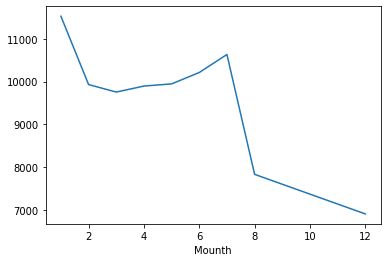

In [20]:
# para identificar os meses com mais missing values
byMounth['zip'].plot()  # a partir do mes 7 começaram a se apresentar muitos missing values

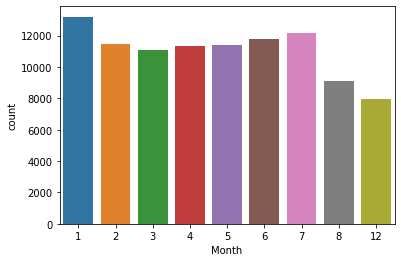

In [30]:
# ou dessa forma percebe-se a contagem diferente entre os meses e ainda faltam os meses 9, 10, 11
sns.countplot(df['Month'])

In [31]:
# para resetar o index, ou colcoar o index para uma coluna 
byMounth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Mounth,Day of week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


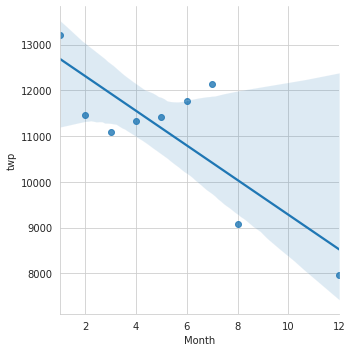

In [35]:
# dessa forma podemos plotar o month em groupby e vizualizar o erro plotado pelos missing values

sns.lmplot(x='Month', y='twp', data=byMounth.reset_index())

In [79]:
# crinado coluna Date
#lógica
day = df['timeStamp'][0]
day.date()

#crinado
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Mounth,Day of week,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,12,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,12,2015-12-10


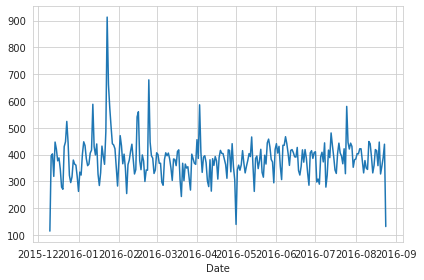

In [81]:
# agrupando por date, latitude é o que melhor representa a contagem de chamadas, pois quase n tem missing values
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

In [87]:
# plotar a contagem das razões por grupos de datas
df[df['Reason']== 'Traffic'].head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Mounth,Day of week,Month,Date
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,17,12,Thu,12,2015-12-10
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,MONTGOMERY,RT202 PKWY & KNAPP RD,1,Traffic,17,12,Thu,12,2015-12-10
11,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,PLYMOUTH,BROOK RD & COLWELL LN,1,Traffic,17,12,Thu,12,2015-12-10
12,40.174131,-75.098491,BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...,19040.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,UPPER MORELAND,BYBERRY AVE & S WARMINSTER RD,1,Traffic,17,12,Thu,12,2015-12-10
13,40.062974,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,CHELTENHAM,OLD YORK RD & VALLEY RD,1,Traffic,17,12,Thu,12,2015-12-10


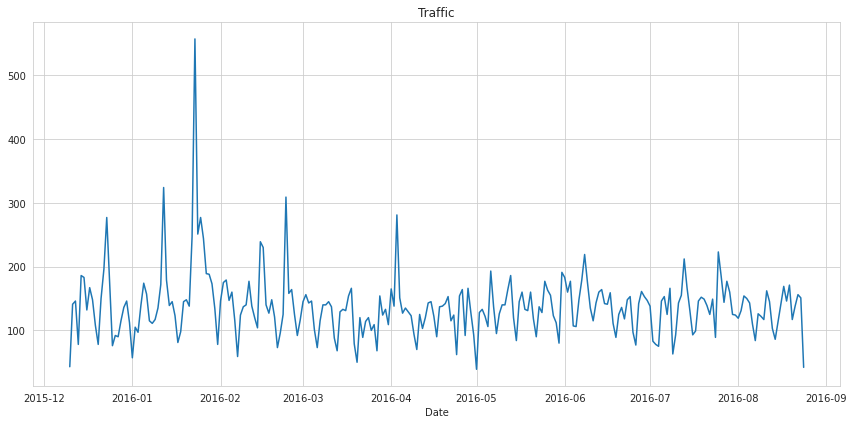

In [117]:
# plota as razões Traffic em contagem de grupos de date por latitude  
plt.figure(figsize=(12,6))  # aumentar o tamanho da figura
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

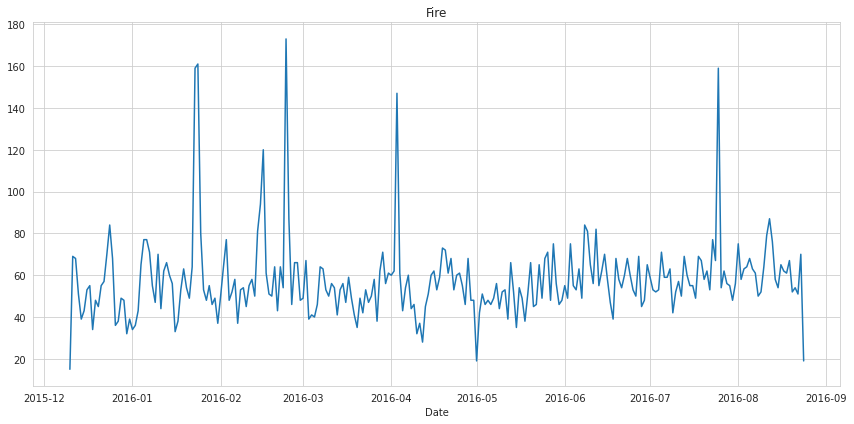

In [118]:
# plota as razões Fire em contagem de grupos de date por latitude  
plt.figure(figsize=(12,6))
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

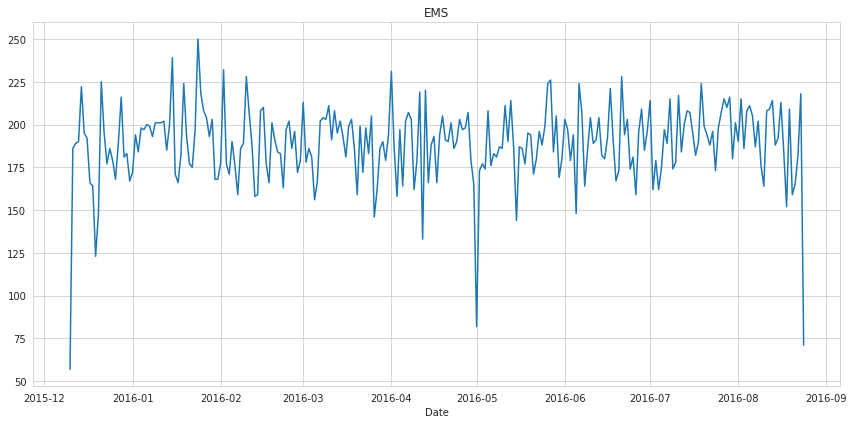

In [119]:
# plota as razões EMS em contagem de grupos de date por latitude  
plt.figure(figsize=(12,6))
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [107]:
# agrupando unstack method multilevel index
df.groupby(by=['Day of week', 'Hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of week Hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
Wed         19    686  686   686  590    686        686  686   682  686   
            20    668  668   668  597    668        668  668   662  668   
            21    575  575   575  508    575        575  574   572  575   
            22    490  490   490  432    490        490  490   485  490   
            23    335  335   335  294    335        335  334   335  335   

                  Reason  Month  Date  
Day of week Hour                       
Fri         0        275    275   275  
            1        235    235   235  
            2        191    191   191  
            3        175    175   175  
            4        201    201   201  
...                  ...    ...   ...  
Wed         19       686    686   686  
            20       668    668   668  
            21       575    575   575  
            22       490    490   490  
            23       335    335   335  

[168 rows x 12 columns]

In [111]:
# agrupando unstack method multilevel index mostrando colunas reasons
df.groupby(by=['Day of week', 'Hour']).count()['Reason']

Day of week  Hour
Fri          0       275
             1       235
             2       191
             3       175
             4       201
                    ... 
Wed          19      686
             20      668
             21      575
             22      490
             23      335
Name: Reason, Length: 168, dtype: int64

In [113]:
# agora para .unstack que reagrupa as linhas e colunas por hora de dia e preencheas com a Reason
df.groupby(by=['Day of week', 'Hour']).count()['Reason'].unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


In [114]:
dayhour = df.groupby(by=['Day of week', 'Hour']).count()['Reason'].unstack()

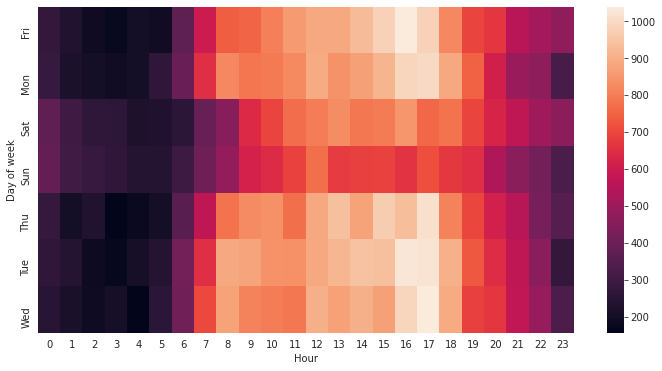

In [120]:
# mapa de calor da hora do dia pelo dia da semana e a contagem das chamadas
plt.figure(figsize=(12,6))
sns.heatmap(dayhour)

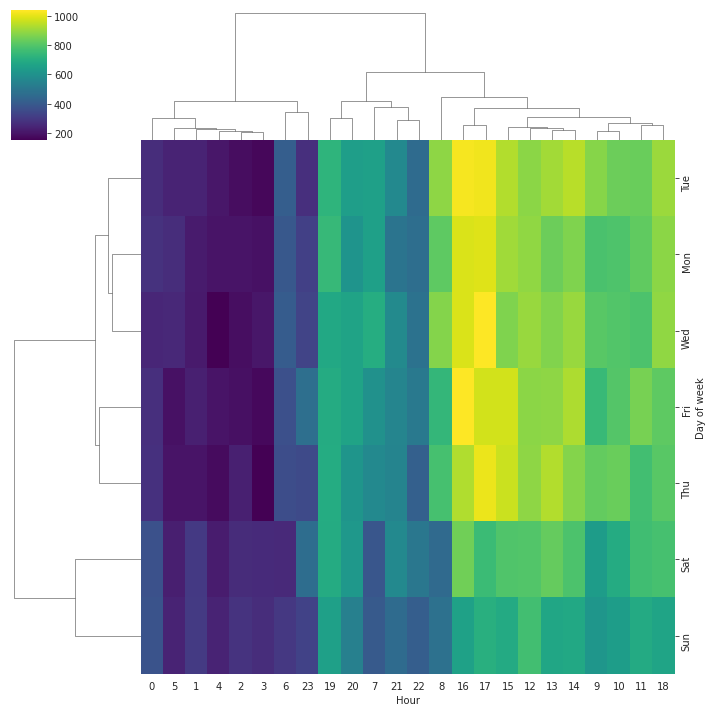

In [121]:
# mapa de calor por cluster
sns.clustermap(dayhour, cmap='viridis')

In [124]:
#criando subgrupos de dias da semana e meses por reasons para contar as ocorrências
df.groupby(by=['Day of week', 'Month']).count()

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
Day of week Month                                                               
Fri         1      1970  1970  1970  1736   1970       1970  1970  1955  1970   
            2      1581  1581  1581  1362   1581       1581  1581  1566  1581   
            3      1525  1525  1525  1332   1525       1525  1523  1519  1525   
            4      1958  1958  1958  1684   1958       1958  1958  1948  1958   
            5      1730  1730  1730  1504   1730       1730  1730  1720  1730   
...                 ...   ...   ...   ...    ...        ...   ...   ...   ...   
Wed         5      1538  1538  1538  1350   1538       1538  1538  1533  1538   
            6      2058  2058  2058  1794   2058       2058  2054  2046  2058   
            7      1717  1717  1717  1504   1717       1717  1715  1711  1717   
            8      1295  1295  1295  1106   1295       1295  1295  1287  1295   
            12     1262  1262  1262  1081   1262       1262  1260  1249  1262   

                   Reason  Hour  Date  
Day of week Month                      
Fri         1        1970  1970  1970  
            2        1581  1581  1581  
            3        1525  1525  1525  
            4        1958  1958  1958  
            5        1730  1730  1730  
...                   ...   ...   ...  
Wed         5        1538  1538  1538  
            6        2058  2058  2058  
            7        1717  1717  1717  
            8        1295  1295  1295  
            12       1262  1262  1262  

[63 rows x 12 columns]

In [127]:
#criando subgrupos de dias da semana e meses por reasons para contar as ocorrências
df.groupby(by=['Day of week', 'Month']).count()['Reason']

Day of week  Month
Fri          1        1970
             2        1581
             3        1525
             4        1958
             5        1730
                      ... 
Wed          5        1538
             6        2058
             7        1717
             8        1295
             12       1262
Name: Reason, Length: 63, dtype: int64

In [128]:
#criando subgrupos de dias da semana e meses por reasons para contar as ocorrências
df.groupby(by=['Day of week', 'Month']).count()['Reason'].unstack()

Month,1,2,3,4,5,6,7,8,12
Day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


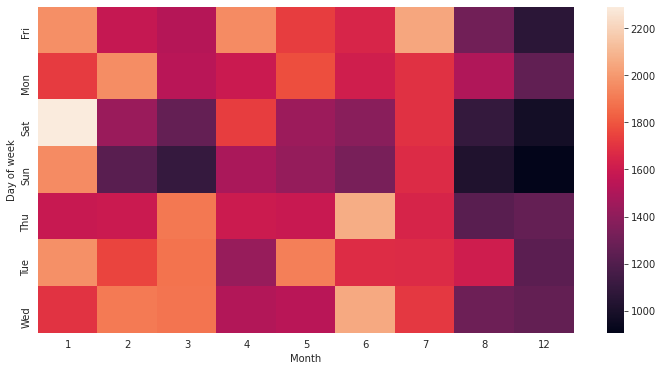

In [131]:
# heatmap de meses por dias da semana e quantidade de ocorrências
daymonth = df.groupby(by=['Day of week', 'Month']).count()['Reason'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(daymonth)

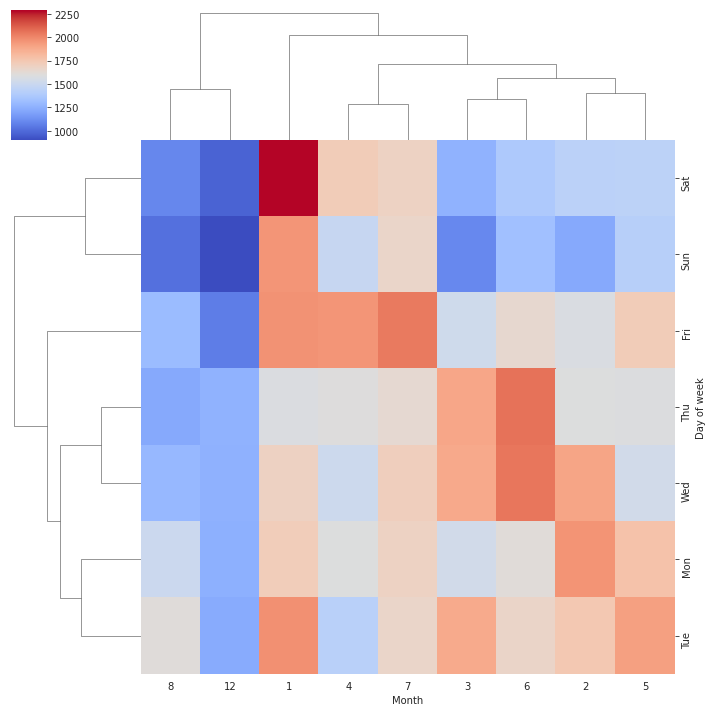

In [135]:
# clusterização
sns.clustermap(daymonth, cmap='coolwarm')